In [860]:
import pandas as pd
import numpy as np

In [861]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Data exploration and preprocessing

In [862]:
train_data = pd.read_csv('aug_train.csv')
test_data = pd.read_csv('aug_test.csv')

In [863]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [864]:
print(train_data.shape)
print(test_data.shape)

(19158, 14)
(2129, 13)


In [865]:
# make sure the original data is unchanged

df = train_data.copy()
test_df = test_data.copy()

In [866]:
# see the proportion of missing data

print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))
print('=================')
print((test_df.isnull().sum() / test_df.shape[0]).sort_values(ascending=False))

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
education_level           0.024011
last_new_job              0.022080
enrolled_university       0.020148
experience                0.003393
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
target                    0.000000
dtype: float64
company_type              0.297792
company_size              0.292156
gender                    0.238610
major_discipline          0.146548
education_level           0.024425
last_new_job              0.018788
enrolled_university       0.014561
experience                0.002349
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
dtype: float64


In [867]:
# check the types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [868]:
# roughly go through what values each feature contains

cols = df.columns.values

for col in cols:
    if df[col].dtype == object:
        print('===={}======'.format(col))
        print(df[col].value_counts())
        print('=============')

====city======
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_121       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
====gender======
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
====relevent_experience======
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
====enrolled_university======
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
====education_level======
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
====major_discipline======
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, d

In [869]:
# check the target and it seems to be imbalanced

df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [870]:
# replace the missing values with the most-frequent appeared ones

for col in cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        test_df[col].fillna(df[col].mode()[0], inplace=True)


In [871]:
# make sure all features have no missing value after filling them

print(df.isnull().sum())
print(test_df.isnull().sum())

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64


## A quick glimpse at feature visualization

In [872]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
sns.set_style('darkgrid');
import warnings
warnings.filterwarnings('ignore')

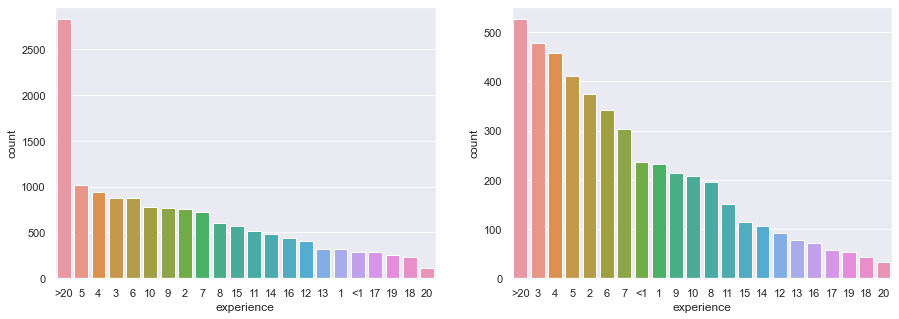

In [873]:
# distribbution of experience with target 0 and 1
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.countplot(df.loc[df['target']==0, 'experience'], ax=ax[0], order=df.loc[df['target']==0, 'experience'].value_counts().index);
sns.countplot(df.loc[df['target']==1, 'experience'], ax=ax[1], order=df.loc[df['target']==1, 'experience'].value_counts().index);

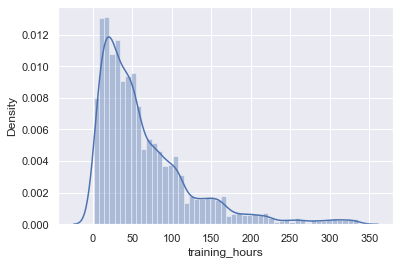

In [874]:
# distribution of training hours
sns.distplot(df['training_hours']);

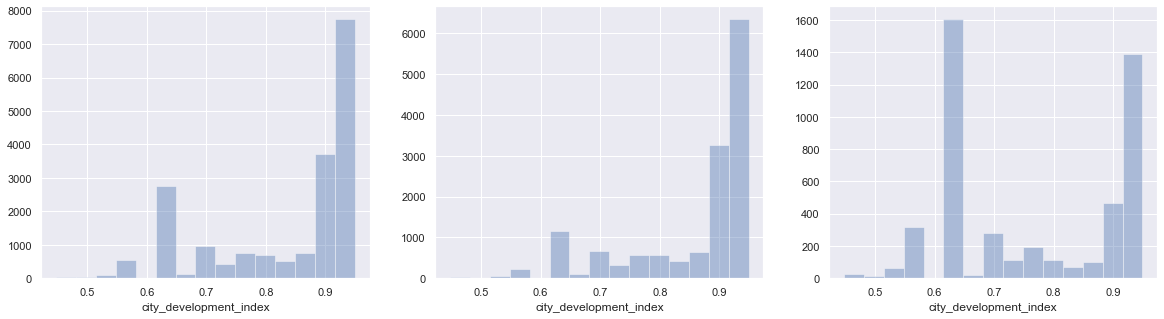

In [875]:
# relation behind target and city development index
fig, ax = plt.subplots(1, 3, figsize=(20,5))

sns.distplot(df['city_development_index'], kde=False, bins=15, ax=ax[0]);
sns.distplot(df.loc[df['target']==0,'city_development_index'], kde=False, bins=15, ax=ax[1]);
sns.distplot(df.loc[df['target']==1,'city_development_index'], kde=False, bins=15, ax=ax[2]);

## Some Adjustments on Features

In [876]:
# make id as the index
df = df.set_index(['enrollee_id'])

In [877]:
# small adjustment for experience and last new job because we want them to be integer type
df['experience'] = df['experience'].replace({'>20': 21, '<1':0}).astype(int)
df['last_new_job'] = df['last_new_job'].replace({'never':0, '>4':5}).astype(int)

In [878]:
# data after preprocessing
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0.0
33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,50-99,Pvt Ltd,0,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


## Categorical to Dummy 

In [879]:
df_dummy = pd.get_dummies(df, drop_first=True)

In [880]:
df_dummy.head()

,city_development_index,experience,last_new_job,training_hours,target,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,city_city_146,city_city_149,city_city_150,city_city_152,city_city_155,city_city_157,city_city_158,city_city_159,city_city_16,city_city_160,city_city_162,city_city_165,city_city_166,city_city_167,city_city_171,city_city_173,city_city_175,city_city_176,city_city_179,city_city_18,city_city_180,city_city_19,city_city_2,city_city_20,city_city_21,city_city_23,city_city_24,city_city_25,city_city_26,city_city_27,city_city_28,city_city_30,city_city_31,city_city_33,city_city_36,city_city_37,city_city_39,city_city_40,city_city_41,city_city_42,city_city_43,city_city_44,city_city_45,city_city_46,city_city_48,city_city_50,city_city_53,city_city_54,city_city_55,city_city_57,city_city_59,city_city_61,city_city_62,city_city_64,city_city_65,city_city_67,city_city_69,city_city_7,city_city_70,city_city_71,city_city_72,city_city_73,city_city_74,city_city_75,city_city_76,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
enrollee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8949,0.920,21,1,36,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
29725,0.776,15,5,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
11561,0.624,5,0,83,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
33241,0.789,0,0,52,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
666,0.767,21,4,8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [881]:
df_dummy['target'] = df_dummy['target'].astype(int)

## Resampling (downsample)

In [882]:
df_dummy.shape

(19158, 153)

In [883]:
df_dummy['target'].value_counts()

0    14381
1     4777
Name: target, dtype: int64

In [884]:
# we use test size of 1/7 because we want to make sure the ratio of train and test after downsampling is 3:1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_dummy.drop(['target'], axis=1), df_dummy['target'], random_state=87,
                                                test_size=1/7)

In [885]:
y_train.value_counts()

0    12317
1     4104
Name: target, dtype: int64

In [886]:
from sklearn.utils import resample

training_set = pd.concat([X_train, y_train], axis=1)

train_major = training_set[training_set['target'] == 0]
train_minor = training_set[training_set['target'] == 1]

train_downsample = resample(train_major, replace=False, n_samples=4104, random_state=87)
train_resample = pd.concat([train_downsample, train_minor]).sample(frac=1)

train_resample['target'].value_counts()

0    4104
1    4104
Name: target, dtype: int64

In [887]:
X_train, y_train = train_resample.drop(['target'], axis=1), train_resample['target']

In [888]:
# check if the result is what we wanted
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8208, 152) (8208,)
(2737, 152) (2737,)


## Scale numeric data (MinMaxScaler)

In [889]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [890]:
scaler = MinMaxScaler()

# keep the original copies just in case
X_train0 = X_train.copy()
X_test0 = X_test.copy()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[0]

array([0.35129741, 0.28571429, 0.2       , 0.04477612, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [891]:
# convert them into dataframe again
X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = pd.DataFrame(data=X_test, columns=X.columns)

# Build ML Models

## KNN Model

In [892]:
from sklearn.model_selection import validation_curve

In [893]:
knn_clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [894]:
knn_clf.score(X_train, y_train)

0.7830165692007798

In [895]:
n_range = [i for i in range(1, 51)]


train_scores_k, test_scores_k = validation_curve(KNeighborsClassifier(), X_train, y_train,
                                             param_name='n_neighbors', param_range=n_range, cv=6)

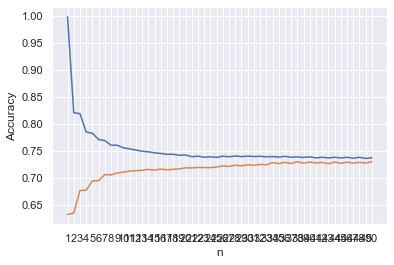

In [896]:
plt.plot(range(len(n_range)), train_scores_k.mean(axis=1));
plt.plot(range(len(n_range)), test_scores_k.mean(axis=1));
plt.xticks(range(len(n_range)), n_range);
plt.xlabel('n');
plt.ylabel('Accuracy');

In [897]:
# best when k = 49
best_knn = KNeighborsClassifier(n_neighbors=49).fit(X_train, y_train)

In [898]:
print('knn train acc: {:.2%}'.format(best_knn.score(X_train, y_train)))
print('knn test acc: {:.2%}'.format(best_knn.score(X_test, y_test)))

knn train acc: 73.62%
knn test acc: 70.84%


## Other models with default setting

In [899]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [900]:
log_reg = LogisticRegression().fit(X_train, y_train)
svm = LinearSVC(random_state=87).fit(X_train, y_train)
dec_tree = DecisionTreeClassifier(random_state=87).fit(X_train, y_train)
forest = RandomForestClassifier(random_state=87).fit(X_train, y_train)

In [901]:
print('log reg acc on train {:.2%}'.format(log_reg.score(X_train, y_train)))
print('log reg acc on test {:.2%}'.format(log_reg.score(X_test, y_test)))
print()
print('svm acc on train {:.2%}'.format(svm.score(X_train, y_train)))
print('svm acc on test {:.2%}'.format(svm.score(X_test, y_test)))
print()
print('tree acc on train {:.2%}'.format(dec_tree.score(X_train, y_train)))
print('tree acc on test {:.2%}'.format(dec_tree.score(X_test, y_test)))
print()
print('forest acc on train {:.2%}'.format(forest.score(X_train, y_train)))
print('forest acc on test {:.2%}'.format(forest.score(X_test, y_test)))

log reg acc on train 73.70%
log reg acc on test 74.64%

svm acc on train 73.49%
svm acc on test 74.53%

tree acc on train 99.85%
tree acc on test 62.29%

forest acc on train 99.85%
forest acc on test 72.31%


## Logistic Regression

In [902]:
C_range = [0.001, 0.01, 0.1, 1, 10, 100]


train_scores_lr, test_scores_lr = validation_curve(LogisticRegression(), X_train, y_train,
                                             param_name='C', param_range=C_range, cv=4)

In [903]:
print('Avg train score of log reg: {}'.format(train_scores_lr.mean(axis=1).round(4)))
print('Avg test score of log reg: {}'.format(test_scores_lr.mean(axis=1).round(4)))


Avg train score of log reg: [0.6951 0.7187 0.7349 0.7384 0.7391 0.7383]
Avg test score of log reg: [0.6954 0.716  0.7283 0.7265 0.7256 0.7248]


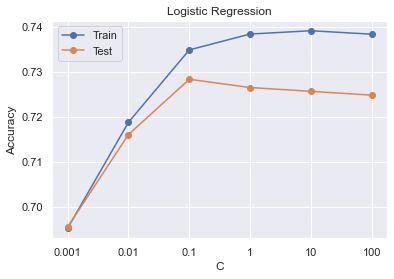

In [904]:
plt.plot(range(len(C_range)), train_scores_lr.mean(axis=1), '-o', label='Train');
plt.plot(range(len(C_range)), test_scores_lr.mean(axis=1), '-o', label='Test');
plt.xticks(range(len(C_range)), C_range);
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend();
plt.title('Logistic Regression');

In [905]:
# we decided to use C = 1 as the best lr model
best_lr = LogisticRegression(C=1).fit(X_train, y_train)

In [906]:
print('lr train acc: {:.2%}'.format(best_lr.score(X_train, y_train)))
print('lr test acc: {:.2%}'.format(best_lr.score(X_test, y_test)))

lr train acc: 73.70%
lr test acc: 74.64%


In [907]:
# getting feature coefficients
coef = best_lr.coef_[0]
features = X_train.columns

log_sm = pd.DataFrame(data=coef, index=features)
log_sm.columns = ['coefficient']

In [908]:
# top 10 positive ones
log_sm[log_sm['coefficient'] >= 0].sort_values('coefficient', ascending=False)[:10]

,coefficient
city_city_21,1.248255
city_city_70,1.003340
city_city_11,0.918800
city_city_43,0.890652
city_city_89,0.851493
city_city_74,0.743610
city_city_160,0.732818
city_city_103,0.715770
city_city_100,0.710663
city_city_106,0.689869


In [909]:
# top 10 negative ones
log_sm[log_sm['coefficient'] < 0].sort_values('coefficient')[:10]

,coefficient
city_development_index,-1.985224
education_level_Primary School,-1.444720
city_city_77,-0.953490
city_city_37,-0.938849
city_city_30,-0.889327
education_level_High School,-0.859689
city_city_157,-0.799652
city_city_152,-0.766560
city_city_40,-0.682110
city_city_82,-0.653387


## Support Vector Machine

In [910]:
C_range = [0.001, 0.01, 0.1, 1, 10, 100]

train_scores_svm, test_scores_svm = validation_curve(LinearSVC(random_state=87), X_train, y_train,
                                             param_name='C', param_range=C_range, cv=4)

In [911]:
print('Avg train score of svm: {}'.format(train_scores_svm.mean(axis=1).round(4)))
print('Avg test score of svm: {}'.format(test_scores_svm.mean(axis=1).round(4)))

Avg train score of svm: [0.7154 0.7339 0.7369 0.738  0.7374 0.663 ]
Avg test score of svm: [0.7141 0.7247 0.725  0.723  0.7217 0.6467]


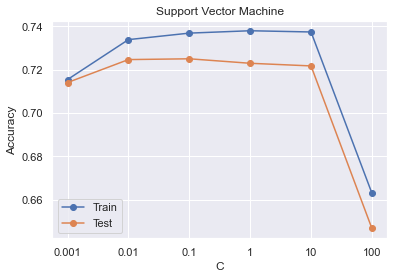

In [912]:
plt.plot(range(len(C_range)), train_scores_svm.mean(axis=1), '-o', label='Train');
plt.plot(range(len(C_range)), test_scores_svm.mean(axis=1), '-o', label='Test');
plt.xticks(range(len(C_range)), C_range);
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend();
plt.title('Support Vector Machine');

In [913]:
# we decided to use C=0.1 for svm
best_svm = SVC(random_state=87, C=0.1).fit(X_train, y_train)

In [914]:
print('svm train acc: {:.2%}'.format(best_svm.score(X_train, y_train)))
print('svm test acc: {:.2%}'.format(best_svm.score(X_test, y_test)))

svm train acc: 74.20%
svm test acc: 75.45%


## Decision Tree

In [915]:
max_leaf_nodes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

train_scores_t, test_scores_t = validation_curve(DecisionTreeClassifier(random_state=87), X_train, y_train,
                                             param_name='max_leaf_nodes', param_range=max_leaf_nodes, cv=4)

In [916]:
print('Avg train score of tree: {}'.format(train_scores_t.mean(axis=1).round(4)))
print('Avg test score of tree: {}'.format(test_scores_t.mean(axis=1).round(4)))

Avg train score of tree: [0.7351 0.7452 0.7496 0.7543 0.7581 0.7607 0.7645 0.7677 0.7715 0.775 ]
Avg test score of tree: [0.7322 0.7327 0.7312 0.7314 0.7292 0.7298 0.7269 0.7251 0.7239 0.7236]


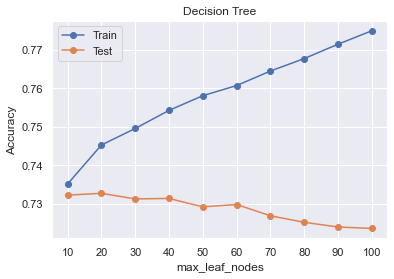

In [917]:
plt.plot(range(len(max_leaf_nodes)), train_scores_t.mean(axis=1), '-o', label='Train');
plt.plot(range(len(max_leaf_nodes)), test_scores_t.mean(axis=1), '-o', label='Test');
plt.xticks(range(len(max_leaf_nodes)), max_leaf_nodes);
plt.xlabel('max_leaf_nodes');
plt.ylabel('Accuracy');
plt.legend();
plt.title('Decision Tree');

In [918]:
# getting the visualization of tree

# target needs to be string
y_train = y_train.astype(str)

# highest test score for 70
best_tree = DecisionTreeClassifier(max_leaf_nodes=70, random_state=87).fit(X_train, y_train)

# convert it back
y_train = y_train.astype(int)

In [919]:
from sklearn.tree import export_graphviz

export_graphviz(best_tree, out_file='best_tree.dot', feature_names=X_train.columns,
                class_names=best_tree.classes_, filled=True)

In [920]:
best_tree = DecisionTreeClassifier(max_leaf_nodes=70, random_state=87).fit(X_train, y_train)
print('tree train acc: {:.2%}'.format(best_tree.score(X_train, y_train)))
print('tree test acc: {:.2%}'.format(best_tree.score(X_test, y_test)))

tree train acc: 75.52%
tree test acc: 73.58%


## Random Forest

In [921]:
min_samples_split = [20, 40, 60, 80, 100, 120]

train_scores_f, test_scores_f = validation_curve(RandomForestClassifier(random_state=87), X_train, y_train,
                                             param_name='min_samples_split', param_range=min_samples_split, cv=4)

In [922]:
print('Avg train score of log reg: {}'.format(train_scores_f.mean(axis=1).round(4)))
print('Avg test score of log reg: {}'.format(test_scores_f.mean(axis=1).round(4)))

Avg train score of log reg: [0.8202 0.794  0.7796 0.773  0.7692 0.765 ]
Avg test score of log reg: [0.7371 0.7435 0.7422 0.7413 0.7409 0.7411]


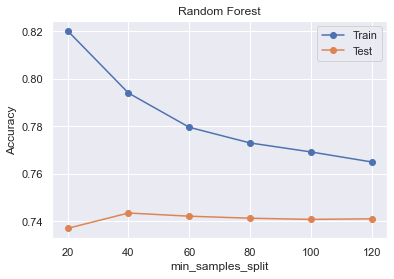

In [923]:
plt.plot(range(len(min_samples_split)), train_scores_f.mean(axis=1), '-o', label='Train');
plt.plot(range(len(min_samples_split)), test_scores_f.mean(axis=1), '-o', label='Test');
plt.xticks(range(len(min_samples_split)), min_samples_split);
plt.xlabel('min_samples_split');
plt.ylabel('Accuracy');
plt.legend();
plt.title('Random Forest');

In [924]:
# highest test scores when min_samples_split = 40
best_forest = RandomForestClassifier(min_samples_split=40, random_state=87)
best_forest.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=40, random_state=87)

In [925]:
print('forest train acc: {:.2%}'.format(best_forest.score(X_train, y_train)))
print('forest test acc: {:.2%}'.format(best_forest.score(X_test, y_test)))

forest train acc: 78.94%
forest test acc: 75.37%


# Feature Importance

## random forest

In [926]:
forest_imp = best_forest.feature_importances_
forest_fea_imp = pd.DataFrame(data=forest_imp, index=features)
forest_fea_imp.columns = ['importance']
forest_fea_imp = forest_fea_imp.sort_values('importance', ascending=False)

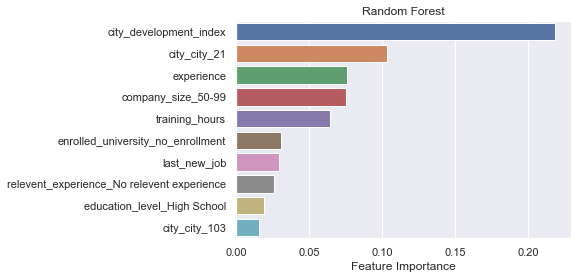

In [927]:
sns.barplot(x=forest_fea_imp[:10].values.reshape(-1,), y=forest_fea_imp.index[:10]);
plt.xlabel('Feature Importance');
plt.title('Random Forest');

## decision tree

In [928]:
tree_imp = best_tree.feature_importances_
tree_fea_imp = pd.DataFrame(data=tree_imp, index=features)
tree_fea_imp.columns = ['importance']
tree_fea_imp = tree_fea_imp.sort_values('importance', ascending=False)

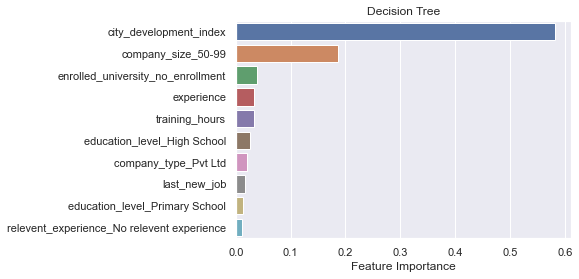

In [929]:
sns.barplot(x=tree_fea_imp[:10].values.reshape(-1,), y=tree_fea_imp.index[:10]);
plt.xlabel('Feature Importance');
plt.title('Decision Tree');

# Prediction on test data points

In [930]:
# same preprocessing as before
test_df['experience'] = test_df['experience'].replace({'>20': 21, '<1':0}).astype(int)
test_df['last_new_job'] = test_df['last_new_job'].replace({'never':0, '>4':5}).astype(int)

In [931]:
test_dummy = pd.get_dummies(test_df, drop_first=True)

In [932]:
# test data do not have some values for city, therefore, different result after dummy

# get what are missing
missing_cols = set(X_train.columns) - set(test_dummy.columns)

In [933]:
# fill them with 0
for col in missing_cols:
    test_dummy[col] = 0

In [934]:
# same ordering as train
test_dummy = test_dummy[X_train.columns]

In [935]:
test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Pvt Ltd,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,0,50-99,Pvt Ltd,0,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,10000+,Pvt Ltd,5,72


In [936]:
test_scaled = scaler.transform(test_dummy)
test_scaled = pd.DataFrame(data=test_scaled, columns=X_train.columns)

In [937]:
samples = test_scaled.head(3)

## final predictions from all models

In [938]:
best_knn.predict(samples)

array([0, 1, 1])

In [939]:
best_lr.predict(samples)

array([0, 1, 1])

In [940]:
best_svm.predict(samples)

array([0, 1, 1])

In [941]:
best_tree.predict(samples)

array([0, 1, 1])

In [942]:
best_forest.predict(samples)

array([0, 1, 1])